## Лабраторная работа №1. Создание "истории о данных".


## Загрузка необходимых библиотек.

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Описание набора данных. Загрузка данных.

 __[Steam Store Games (Clean dataset)](https://www.kaggle.com/datasets/nikdavis/steam-store-games?select=steam.csv)__ Combined data of 27,000 games scraped from Steam and SteamSpy APIs. Dataset contains:

- **appid:** Unique identifier for each title
- **name:** Title of app (game)
- **release_date:** Release date in format YYYY-MM-DD
- **english:** Language support: 1 if is in English
- **developer:** Name (or names) of developer(s). Semicolon delimited if multiple
- **publisher:** Name (or names) of publisher(s). Semicolon delimited if multiple 
- **platforms:** Semicolon delimited list of supported platforms. At most includes: windows;mac;linux
- **required_age:** Minimum required age according to PEGI UK standards. Many with 0 are unrated or unsupplied.
- **categories:** Semicolon delimited list of game categories, e.g. single-player;multi-player
- **genres:** Semicolon delimited list of game genres, e.g. action;adventure
- **steamspy_tags:** Semicolon delimited list of top steamspy game tags, similar to genres but community voted, e.g. action;adventure
- **achievements:** Number of in-games achievements, if any
- **positive_ratings:** Number of positive ratings, from SteamSpy
- **negative_ratingst:** Number of negative ratings, from SteamSpy
- **average_playtime:** Average user playtime, from SteamSpy
- **median_playtime:** Median user playtime, from SteamSpy
- **owners:** Estimated number of owners. Contains lower and upper bound (like 20000-50000). May wish to take mid-point or lower bound. Included both to give options.
- **price:** Current full price of title in GBP, (pounds sterling)



### Загрузка набора данных

С помощью представленных данных можно проанализировать качество предоставляемых услуг авиакомпанией. И определить дальнейшую стратегию улучшения качества услуг авиакомпании, которая позволит привлечь большее количество пассажиров и тем самым увеличить прибыль.

## 1.   Определение перечня операционных систем, на которых поддерживаются игры

In [45]:
data = pd.read_csv('starcraft_player_data.csv', sep=",")
# Первые 5 строк датасета
data = data.drop(['GameID'], axis=1)
data.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [46]:
data.dtypes


LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

([<matplotlib.patches.Wedge at 0x21547694700>,
 [Text(0.8045083504569398, 0.7501775216874028, 'Bronze'),
  Text(-0.6882236115228018, 0.8581073712202407, 'Silver'),
  Text(-1.0018407647429992, -0.45421920049593084, 'Gold'),
  Text(-0.06459903035833876, -1.0981015277636046, 'Platinum'),
  Text(0.7689506830637547, -0.7865842911066717, 'Diamond'),
  Text(1.0437779190648944, -0.3471709314913321, 'Master'),
  Text(1.0926494802731535, -0.12695319318082604, 'GrandMaster'),
  Text(1.0994231286952005, -0.03561999564930912, 'Professional')],
 [Text(0.4388227366128762, 0.40918773910221967, '23.9%'),
  Text(-0.37539469719425544, 0.4680585661201312, '23.7%'),
  Text(-0.5464585989507268, -0.24775592754323497, '18.3%'),
  Text(-0.03523583474091205, -0.5989644696892388, '16.3%'),
  Text(0.4194276453075025, -0.4290459769672754, '10.2%'),
  Text(0.5693334103990332, -0.18936596263163566, '4.9%'),
  Text(0.5959906256035381, -0.06924719628045056, '1.6%'),
  Text(0.5996853429246547, -0.019429088535986794, '1

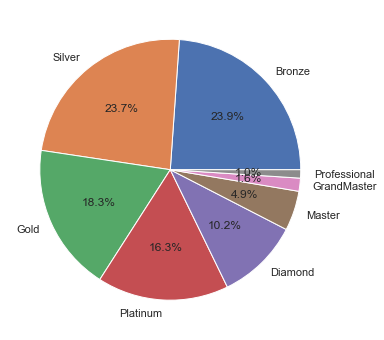

In [47]:
plt.figure(figsize=(6,6))
plt.pie(data['LeagueIndex'].value_counts(),labels=['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professional'], autopct='%1.1f%%') 

15.910751722072478


<ipython-input-48-8b6b9db67a72>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HoursPerWeek'][i]= int(data['HoursPerWeek'][i])
<ipython-input-48-8b6b9db67a72>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  except: data['HoursPerWeek'][i]=mean
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HoursPerWeek', ylabel='Density'>

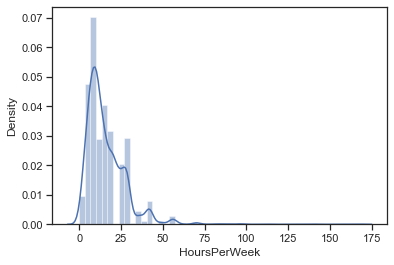

In [48]:
mean = 0
count = 0
for i in range(len(data['HoursPerWeek'])):
    if (data['HoursPerWeek'][i] !='?'):
        mean+=int(data['HoursPerWeek'][i])
        count+=1
mean=mean/count
print(mean)
for i in range(len(data['HoursPerWeek'])):
    try:
      data['HoursPerWeek'][i]= int(data['HoursPerWeek'][i])
    except: data['HoursPerWeek'][i]=mean
#print(data['HoursPerWeek'])
sns.distplot(data['HoursPerWeek'])

<AxesSubplot:xlabel='UniqueUnitsMade'>

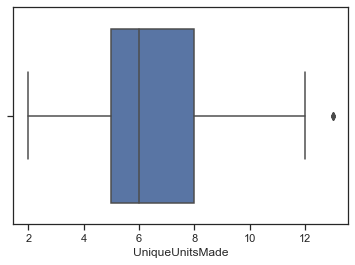

In [49]:
sns.boxplot(x=data['UniqueUnitsMade'])

<ipython-input-50-743ad4758516>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LeagueIndex'][i]=labels[data['LeagueIndex'][i]-1]
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:xlabel='APM', ylabel='Density'>

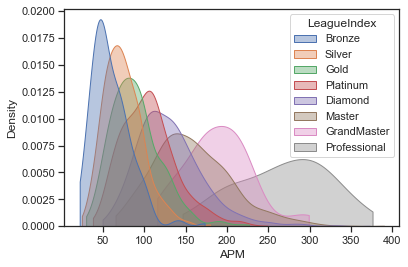

In [50]:
labels=['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professional']
for i in range(len(data['LeagueIndex'])):
     data['LeagueIndex'][i]=labels[data['LeagueIndex'][i]-1]
sns.kdeplot(data=data, x="APM", hue="LeagueIndex", hue_order=labels,cut=0, fill=True, common_norm=False, alpha=0.4)

Большее всего игр поддерживаю все три операционные системы "windows;mac;linux" - 68,0%, при это игр, которые бы не поддерживали операционную систему "windows" вовсе нет.

## 2. Визуализация разпределения оценок по различным характеристикам

Определим количество оценок по каждому параметру.

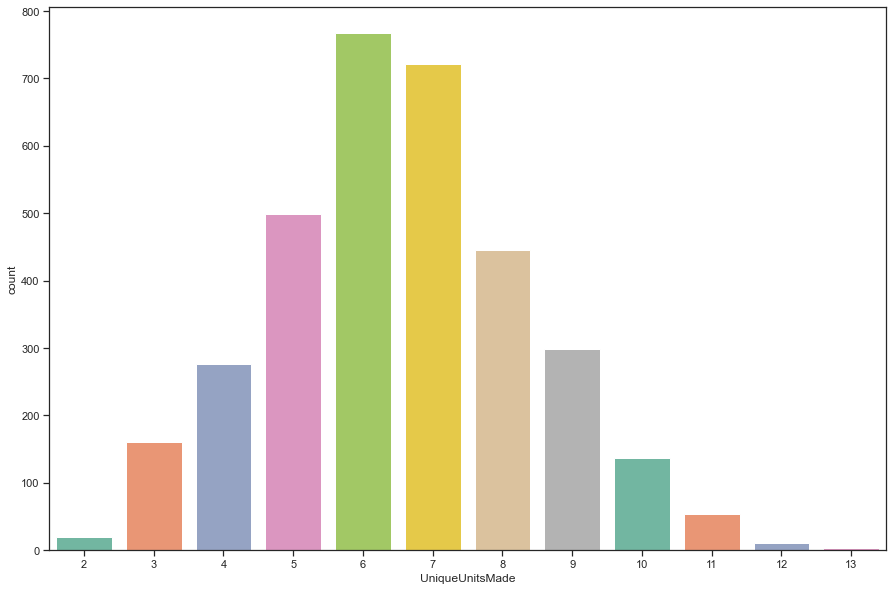

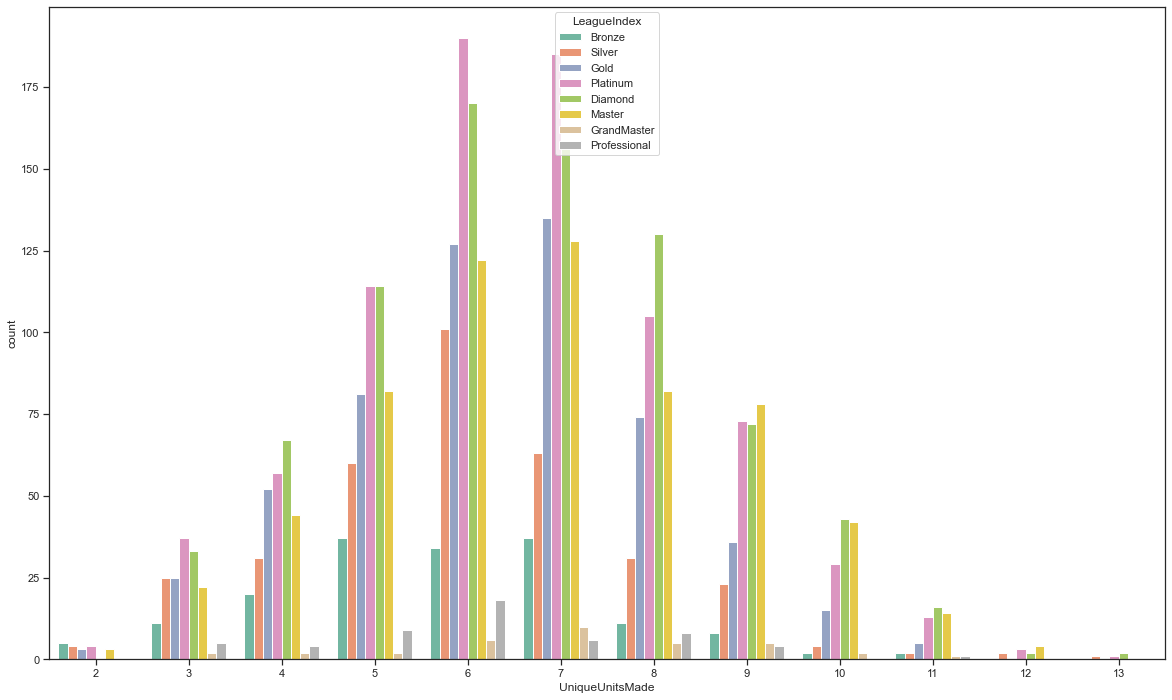

In [51]:
fig, axes = plt.subplots(figsize = (15, 10))
sns.countplot(x = 'UniqueUnitsMade',  data = data, palette="Set2");
fig, axes = plt.subplots(figsize = (20, 12))
sns.countplot(x = 'UniqueUnitsMade', hue="LeagueIndex", hue_order=labels, data = data, palette="Set2");

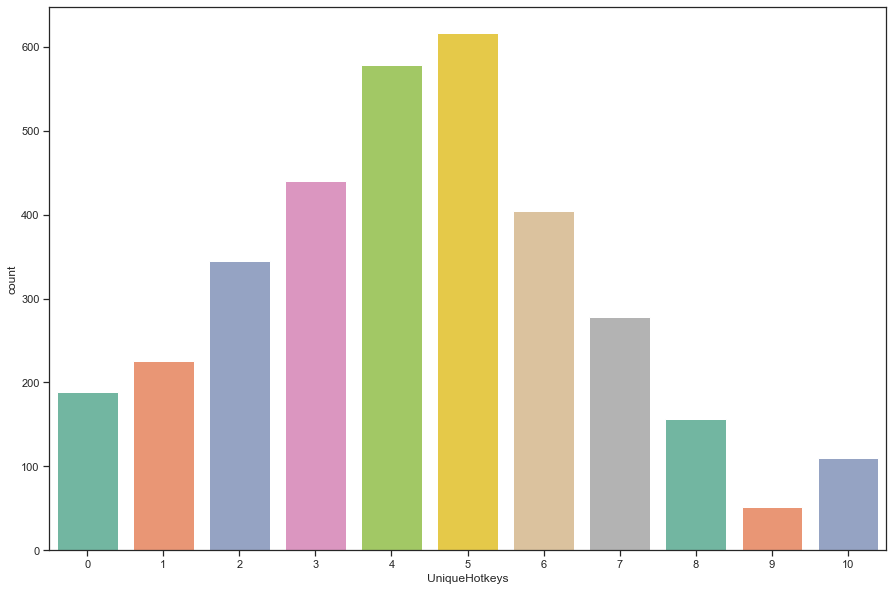

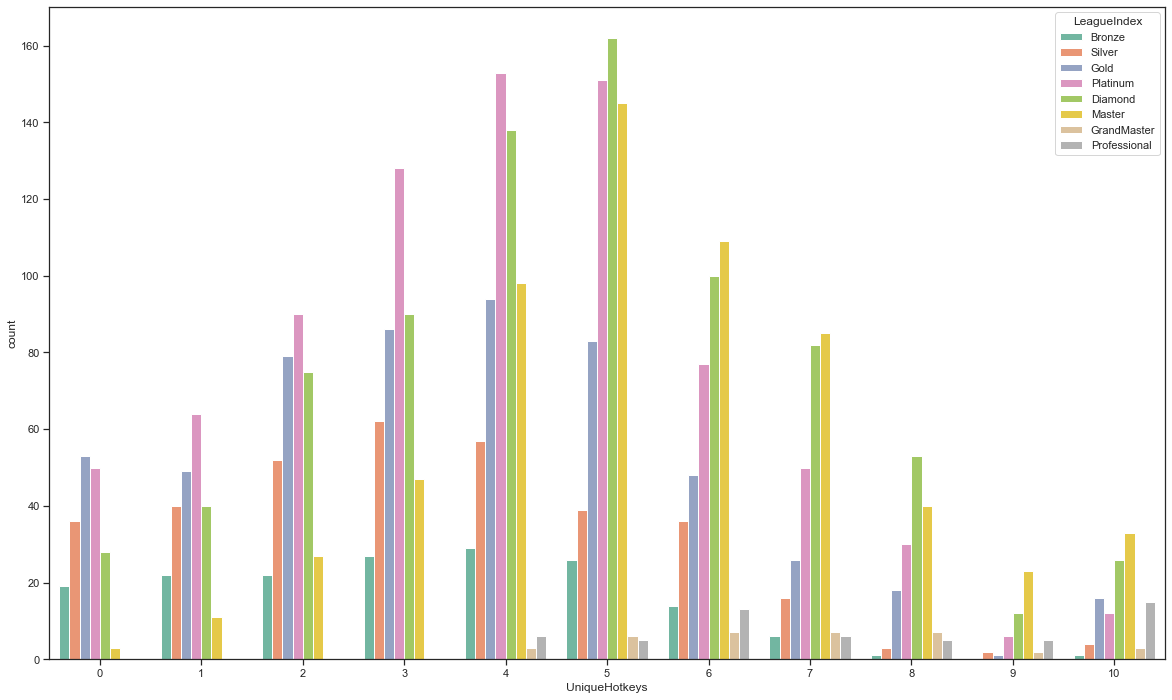

In [52]:
fig, axes = plt.subplots(figsize = (15, 10))
sns.countplot(x = 'UniqueHotkeys',  data = data, palette="Set2");
fig, axes = plt.subplots(figsize = (20, 12))
sns.countplot(x = 'UniqueHotkeys', hue="LeagueIndex", hue_order=labels, data = data, palette="Set2");

Данные графики показывают общее количество всех оценок по каждому параметру. Чтобы определить приоритет услуг, качество которых необходимо улучшить, построим графики с группировкой оценок по Классам. Так как вероятно улучшения необходимы только в некоторых из них.

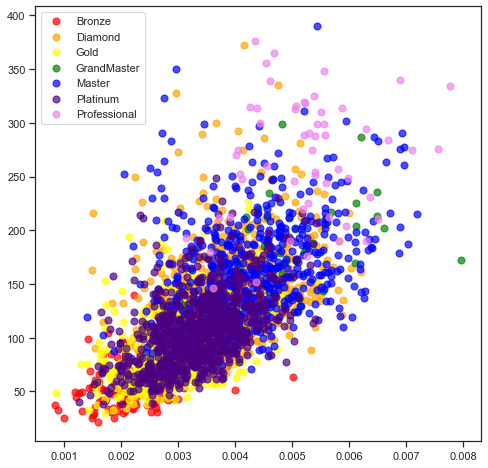

In [59]:
import numpy as np
import matplotlib.pyplot as plt
FLIPPER_LENGTH = data["NumberOfPACs"].values
BILL_LENGTH = data["APM"].values

SPECIES = data["LeagueIndex"].values
SPECIES_ = np.unique(SPECIES)

COLORS = ["#ff0000", "#ffa500", "#ffff00", "#008000", "#0000ff", "#4b0082", "#ee82ee" ]

fig, ax = plt.subplots(figsize=(8,8))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    # No legend will be generated if we don't pass label=species
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )
    
ax.legend();


Услиги "Wi-Fi в поелете" и "легкость онлайн бронирования" имеют большее количество оценок 2 и 3 во всех классах.  

<AxesSubplot:>

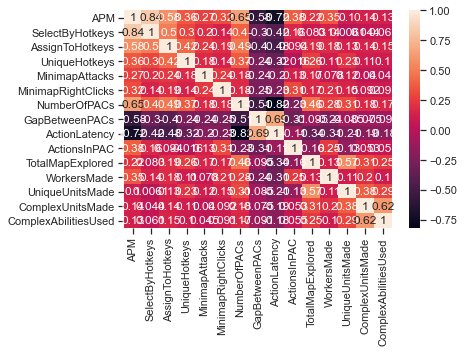

In [65]:
corr_matrix = data.corr()

sns.heatmap(data.corr(), annot=True)
sns.set(rc = {'figure.figsize':(15,8)})

Графики параметров представленные выше показывают, что для бизнес-класса большее количество оценок находится в диапазоне от 3 до 5, что говорит о хорошем качестве услуг. Для класса эконом+ распределение оценок примерно одинаково. 

##3. Визуализация распределения возраста и пола пассажиров относительно удовлетворенности услугами

In [ ]:
# Распределение параметра "Возраст" сгруппированного по параметру "Удовлетвореннось".
sns.violinplot(x='Age', y='satisfaction',  data=data)

Из графика выше видно, что большее количество пассажиров, удовлетворенных услугами, находятся в возрасте примерно от 35 до 60 лет. В большинстве случаев неудовлетворены услугами (или нейтральны) пассажиры в возрасте от 15 до 40.


Рассмотрим более подробно соотношение мужчин и женщин довольных или недовольных услугами авиакомпании.

In [ ]:
sns.displot(data, x="Age", hue="Gender", col="satisfaction")

In [ ]:
sns.displot(data, x="Age", hue="Gender",col="satisfaction", multiple="stack", binwidth= 5)

In [ ]:
sns.displot(data, x="Age", hue="Gender", col="satisfaction",  binwidth= 5)

Соотношение мужчин и женщин примерно одинаково, исключением являются недовольные пассажиры в возрасте от 22 до 26. В данном диапазоне женщин немного больше.

##4. Визуализация влияния расстояния полета на итоговую оценку.

Построим график показывающий распределение оценок в зависимости от расстояния полета.

In [ ]:
sns.boxplot(data=data, x="Flight Distance", y="satisfaction")

Большее количество недовольних пассажиров летали на расстояния до 1200. 

In [ ]:
sns.boxenplot(data=data, x="Flight Distance", y="satisfaction")

Добавим группировку данных по классу билетов.

In [ ]:
plt.figure(figsize=(9,9))
sns.boxenplot(data=data, x="Flight Distance", y="satisfaction", hue="Class")

##5. Визуализация корреляции между парамметрами

Построим корреляционную матрицу, чтобы определить какие параметры сильно влияют на удовлетворенность пасажиров услугами компании.

In [ ]:
plt.figure(figsize=(24,24))
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm',)

Так как "Удовлетворенность" является категориальным признаком, она не отображается в корреляционной матрице. Следовательно необходимо преобразовать данные в числовые.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_le = le.fit_transform(data['satisfaction'])
data['satisfaction'] = data_le

#data_le = le.fit_transform(data['Class'])
#data['Class'] = data_le

#data_le = le.fit_transform(data['Gender'])
#data['Gender'] = data_le

#data_le = le.fit_transform(data['Type of Travel'])
#data['Type of Travel'] = data_le

#data_le = le.fit_transform(data['Customer Type'])
#data['Customer Type'] = data_le

data.head()

In [ ]:
plt.figure(figsize=(24,24))
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm',)

Из данной матрицы видно, что наибольшее влияние по сравнению с другими параметрами имеют: Онлайн-посадка, Развлечения в полете и Комфорт сидений.

##Вывод

На основе проведенных исследований набора данных с оценками пасажиров можно сделать следующие выводы:

*   45% пассажиров от общего колличества оценивших качество услуг авиакомпании преобретали билеты "Бизнес-класса", 47,8% - "Эконом+" и 7,2% - "Эконом".
*   Большинство низких оценок пасажиры поставили следующим параметрам " удобство онлайн бронирования" и "wi-fi в полете"
*   Большее количество пасажиров, удовлетворенных услугами, находятся в возрасте примерно от 35 до 60 лет. В большинстве случаев неудовлетворены услугами (или нейтральны) пасажиры в возрасте от 15 до 40.
*   Соотношение мужчин и женщин (довольных и недовольных) примерно одинаково, исключением являются недовольные пассажиры в возрасте от 22 до 26. В данном диапазоне женщин немного больше.
*   Большее количество недовольних пассажиров летали на расстояния до 2000.
*   На данном этапе визуализации и обработки данных наибольшее влияние на итоговую оценку полета влияют "Онлайн-посадка", "Развлечения в полете" и "Комфорт сидений".

Чтобы улучшить качество предоставляемых услуг авиакомпанией, необходимо более подробно изучить оценки пассажиров в возрасте от 15 до 40 и оценки пассажиров, летающих на небольшие расстояния (до 2000). 

Также,стоит обратить внимание на следующие параметры: "Онлайн-посадка", "Развлечения в полете" и "Комфорт сидений" - так как они влияют на итоговую удовлетворенность пасажиров. Следует сделать более удобным онлайн-бронирование билетов и улучшить качество wi-fi в полете, так как именно эти параметры имеют много низких оценок.

Также необходима дальнейшая обработка набора данных, для более точного анализа влияния параметров на итоговую оценку.





